# Signals and Systems for Dummies, Chapter 8

## Beat signal

In [323]:
from pathlib import Path
import sys

if (root := str(Path().resolve().parent.parent / "python")) not in sys.path:
    sys.path.append(root)
print(*sys.path, sep="\n")

import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
from rfdsppy import continuous_time as conttime, plotting
# import mplcursors

from importlib import reload

reload(conttime)
reload(plotting)

# %matplotlib ipympl
%matplotlib inline

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/rfdsp_sim/python/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/rfdsp_sim
/home/ryanwtsai/repos/rfdsp_sim/python


In [265]:
fc = 440
Tc = 1/fc
Ts = Tc/50

fmod = 5
Tmod = 1/5
d = 1*Tmod

t = np.linspace(0, d, np.round(d/Ts).astype("int"))

xmod = np.cos(2*np.pi*fmod*t)
x = np.cos(2*np.pi*fc*t)*xmod
# x = np.cos(2*np.pi*(fc+fmod)*t) + np.cos(2*np.pi*(fc-fmod)*t)

Text(0.5, 1.0, '440Hz x 5Hz')

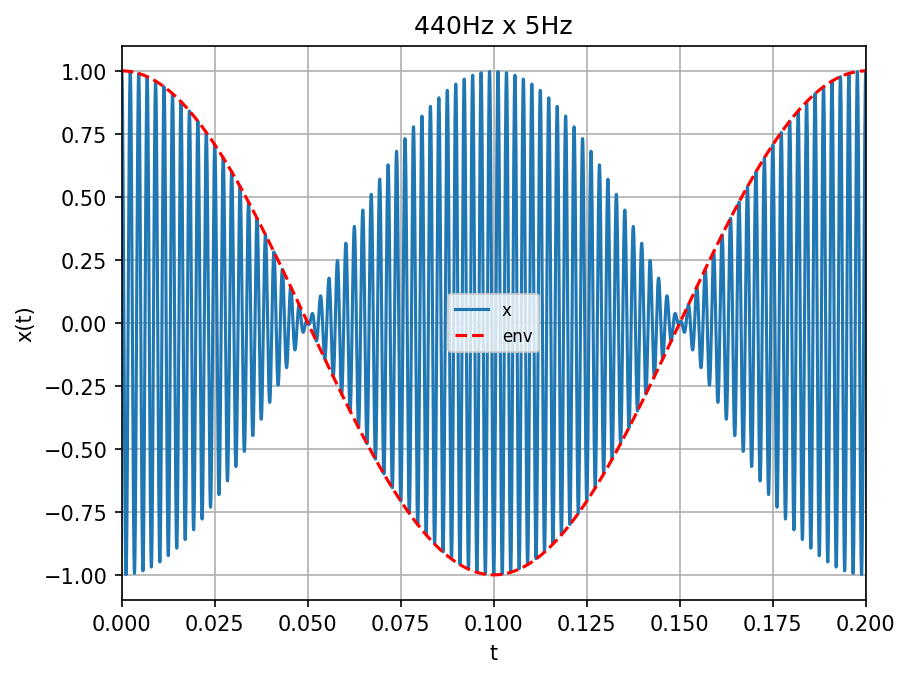

In [266]:
fig, ax = plt.subplots(dpi=150)
ax.plot(t, x, label="x")
ax.plot(t, xmod, 'r--', label="env")
# ax.plot(t, -xmod, 'r--')
ax.set_xlim(left=0, right=d)
ax.grid()
ax.legend(fontsize=8)
ax.set_ylabel("x(t)")
ax.set_xlabel("t")
ax.set_title("440Hz x 5Hz")

## Fourier series for pulse train/square wave

/home/ryanwtsai/repos/rfdsp_sim/python/rfdsppy/continuous_time.py:35: RuntimeWarning: divide by zero encountered in divide
  self.Xk_ = self.A/1j/np.pi/self.k_
/home/ryanwtsai/repos/rfdsp_sim/python/rfdsppy/continuous_time.py:35: RuntimeWarning: invalid value encountered in divide
  self.Xk_ = self.A/1j/np.pi/self.k_


(-24.0, 24.0)

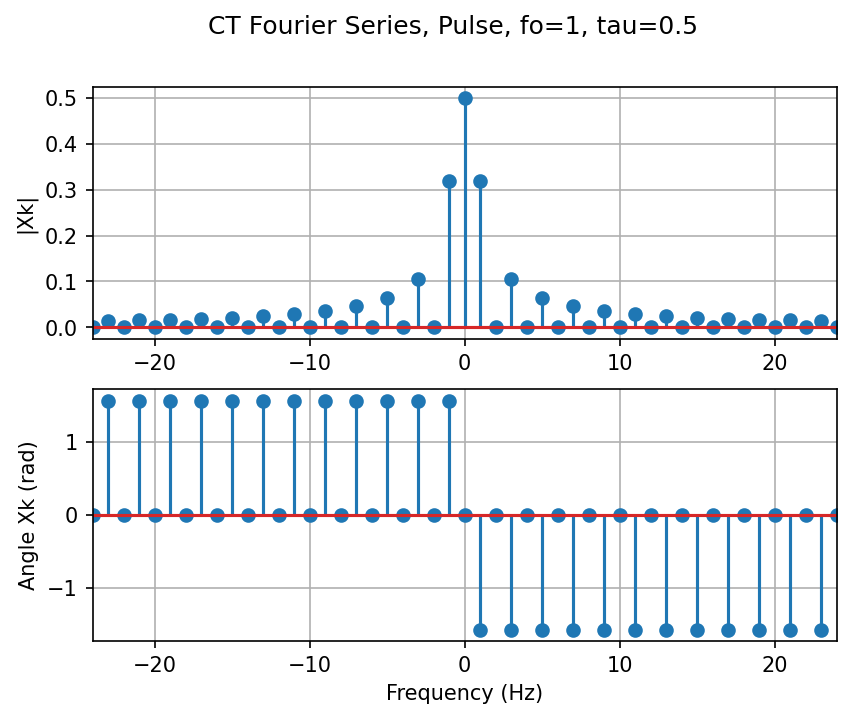

In [315]:
A = 1
fo = 1
To = 1/fo
tau = To/8
tau = To/2

per_pulse_gen = conttime.CTPeriodicSigGen(A=A, fo=fo, To=To, tau=tau)
f, Xk = per_pulse_gen.calc_fourier_series_coef()
fig, axs = plotting.plot_ctfs(f, Xk, title=f"CT Fourier Series, Pulse, fo={fo}, tau={tau}")
axs[1].set_xlim(left=-24, right=24)

### Reconstruction

(0.0, 1.0)

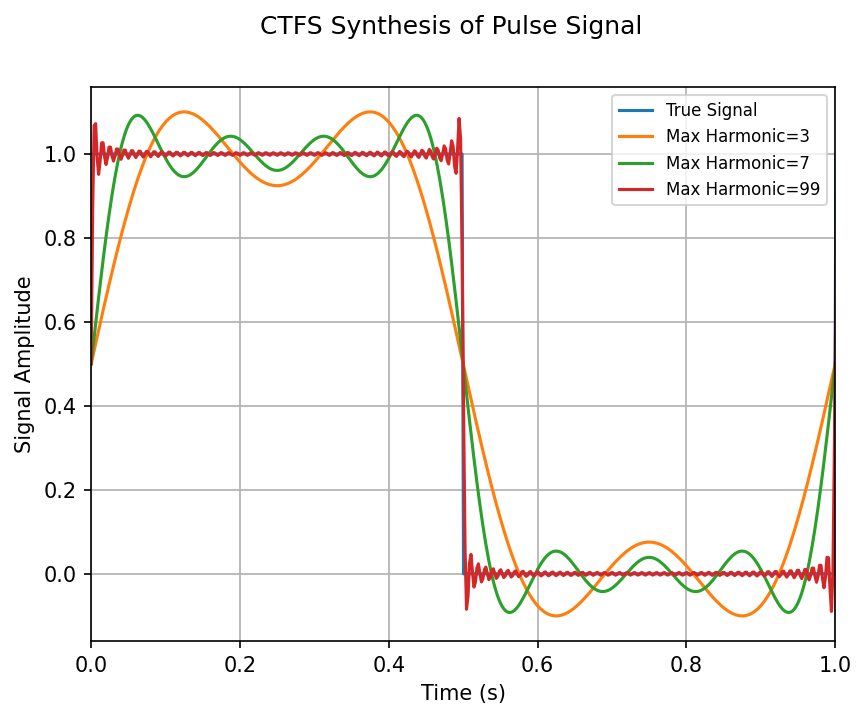

In [317]:
orders = [3, 7, 99]

for odx, order in enumerate(orders):
    t, x, xr = per_pulse_gen.gen_sig(max_harmonic=order)
    if odx > 0:
        T = np.concatenate((T, t[np.newaxis, :]), axis=0)
        X = np.concatenate((X, xr[np.newaxis, :]), axis=0)
    else:
        T = np.tile(t[np.newaxis, :], [2, 1])
        X = np.concatenate((x[np.newaxis, :], xr[np.newaxis, :]), axis=0)

labels = [f"Max Harmonic={order}" for order in orders]
labels.insert(0, "True Signal")

fig, ax = plotting.plot_ct_sig(T, X, labels=labels, title="CTFS Synthesis of Pulse Signal")
ax.set_xlim(left=0, right=To)

## Fourier series for triangle wave

(-12.0, 12.0)

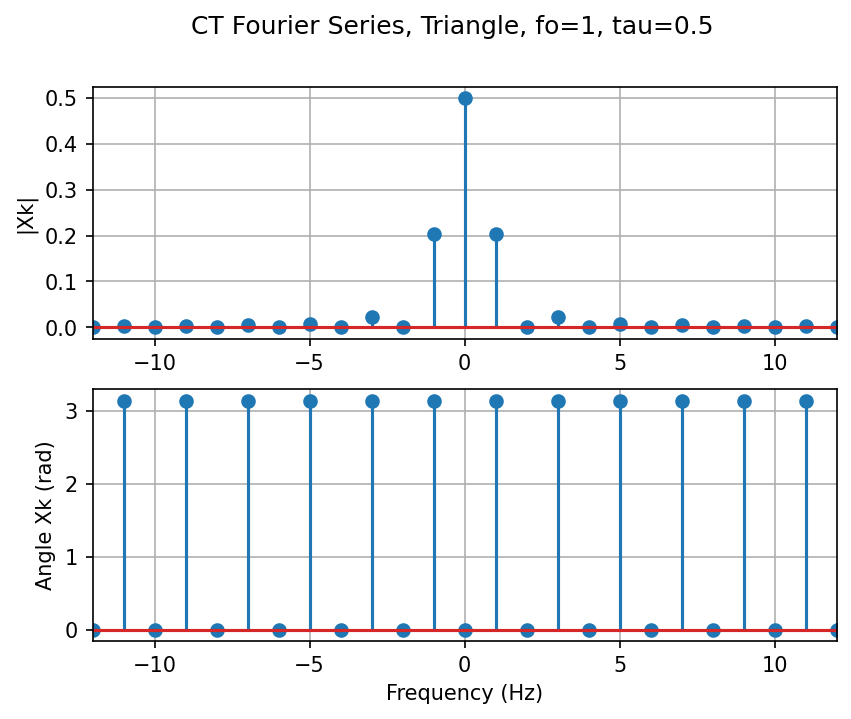

In [324]:
A = 1
fo = 1
To = 1/fo

per_tri_gen = conttime.CTPeriodicSigGen(sigtype="triangle", A=A, fo=fo, To=To)
f, Xk = per_tri_gen.calc_fourier_series_coef()
fig, axs = plotting.plot_ctfs(f, Xk, title=f"CT Fourier Series, Triangle, fo={fo}, tau={tau}")
axs[1].set_xlim(left=-12, right=12)

### Reconstruction

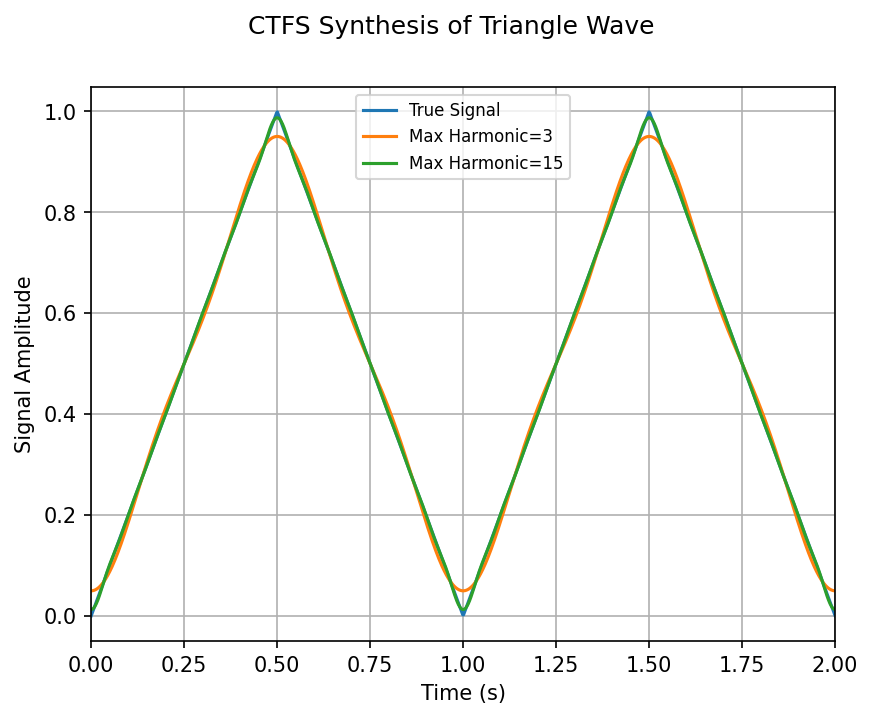

In [ ]:
orders = [3, 15]

for odx, order in enumerate(orders):
    t, x, xr = per_tri_gen.gen_sig(max_harmonic=order)
    if odx > 0:
        T = np.concatenate((T, t[np.newaxis, :]), axis=0)
        X = np.concatenate((X, xr[np.newaxis, :]), axis=0)
    else:
        T = np.tile(t[np.newaxis, :], [2, 1])
        X = np.concatenate((x[np.newaxis, :], xr[np.newaxis, :]), axis=0)

labels = [f"Max Harmonic={order}" for order in orders]
labels.insert(0, "True Signal")

fig, ax = plotting.plot_ct_sig(T, X, labels=labels, title="CTFS Synthesis of Triangle Wave")
# ax.set_xlim(left=0, right=To)

### Square wave vs. triangle wave rolloff

/tmp/ipykernel_35227/1379124801.py:10: RuntimeWarning: divide by zero encountered in divide
  Xk_tri = -2*A/np.pi**2/k**2
/tmp/ipykernel_35227/1379124801.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.stem(f, 20*np.log10(np.abs(Xk)/np.max(np.abs(Xk))), linefmt="C0", label="Square Wave")
/tmp/ipykernel_35227/1379124801.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.stem(f, 20*np.log10(np.abs(Xk_tri)/np.max(np.abs(Xk_tri))), linefmt="C1", label="Triangle Wave")


Text(0.5, 1.0, 'Square Wave vs. Triangle Wave Rolloff')

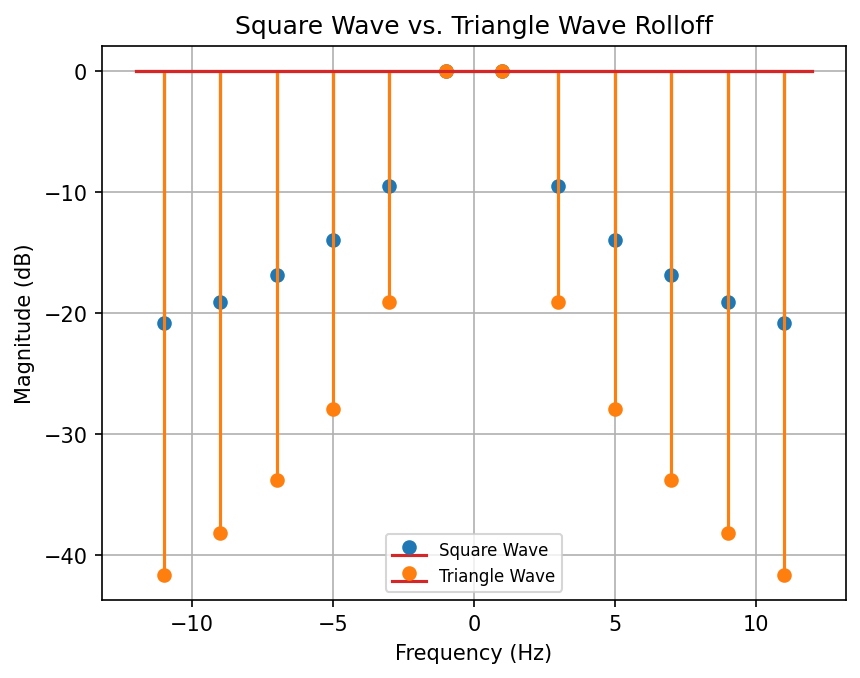

In [235]:
A = 1
fo = 1
To = 1/fo
tau = To/2

sidelobe = 1/fo/tau
k = np.arange(np.floor(-6*sidelobe), np.floor(6*sidelobe+1))
Xk = A*tau/To*np.sinc(k*fo*tau)*np.exp(-1j*np.pi*k*fo*tau) # rectangle
Xk[np.mod(k, 2) == 0] = 0
Xk_tri = -2*A/np.pi**2/k**2
Xk_tri[np.mod(k, 2) == 0] = 0
f = k*fo

fig, ax = plt.subplots(dpi=150)
ax.stem(f, 20*np.log10(np.abs(Xk)/np.max(np.abs(Xk))), linefmt="C0", label="Square Wave")
ax.stem(f, 20*np.log10(np.abs(Xk_tri)/np.max(np.abs(Xk_tri))), linefmt="C1", label="Triangle Wave")
ax.grid()
# ax.set_ylim(bottom=-60, top=1)
ax.legend(fontsize=8)
ax.set_ylabel("Magnitude (dB)")
ax.set_xlabel("Frequency (Hz)")
ax.set_title("Square Wave vs. Triangle Wave Rolloff")